In [55]:
import numpy as np
import matplotlib.pyplot as plt


class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000, debug=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.debug = debug

    def fit(self, X, y):
        X = X.copy()
        X = np.c_[np.ones(X.shape[0]), X]
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        y_ = np.where(y <= 0, -1, 1)
        for iter in range(self.n_iterations):
            if self.debug:
                print(f"Iteration {iter}")

            for idx, x_i in enumerate(X):
                linear_output = x_i @ self.weights
                y_predicted = np.where(linear_output <= 0, -1, 1)
                # update rule
                if y_[idx] != y_predicted:
                    self.weights += self.learning_rate * (y_[idx] - y_predicted) * x_i
        return self.weights

    def predict(self, X):
        linear_output = X @ self.weights
        y_pred = np.where(linear_output > 0, 1, -1)

    def plot_decision_boundary(self, X, y, weights):
        plt.scatter(X[:, 0], X[:, 1], c=y)
        intercept = -weights[0] / weights[2]
        slope = -weights[1] / weights[2]
        x_min = np.min(X[:, 0])
        x_max = np.max(X[:, 0])
        x = np.linspace(x_min, x_max, 100)
        y = slope * x + intercept
        plt.plot(x, y, color="black")

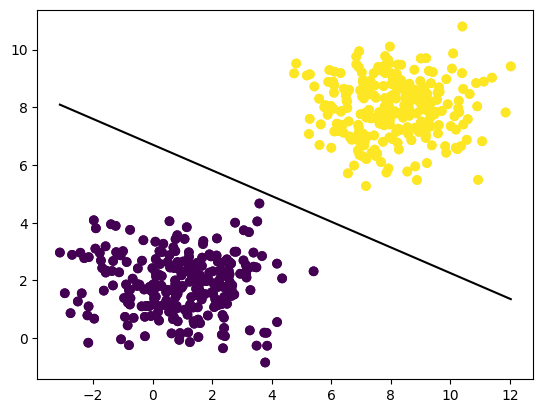

In [56]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(69)
n_features = 2
n_samples = 250

x11 = np.random.normal(loc=1, scale=1.5, size=n_samples)
x12 = np.random.normal(loc=2, scale=1, size=n_samples)
y1 = np.zeros(n_samples)

x21 = np.random.normal(loc=8, scale=1.5, size=n_samples)
x22 = np.random.normal(loc=8, scale=1, size=n_samples)
y2 = np.ones(n_samples)


# plt.scatter(x11, x12, color = 'red')
# plt.scatter(x21, x22, color = 'blue')

X = np.stack([np.concatenate([x11, x21]), np.concatenate([x12, x22])], axis=1)
y = np.concatenate([y1, y2])

plt.scatter(X[:, 0], X[:, 1], c=y)

perceptron = Perceptron(learning_rate=0.01, n_iterations=1000, debug=False)
weights = perceptron.fit(X, y)

perceptron.plot_decision_boundary(X, y, weights)